# Engineering Formulas
Mechanical / piping engineering calculations.

In [1]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Basics

## Velocity / Diameter / Flowrate

Simply formula manipulation to make it easy to switch between velocity / diameter and flowrate.

**Formula**
$$ Q = AV  $$

**Parameters**
- A : float
    - Area of pipe, [m²]
- V : float
    - Velocity, [m/s]
- Q : float
    - Flowrate, [m³/s]
**Returns**

Various

**Python Formula**

In [2]:
def vel_dia_flo(Q_m3h = None, V_ms = None, dia_mm = None):
    list = [Q_m3h, V_ms, dia_mm]
    if sum([v is None for v in list]) == 1:
        if Q_m3h is None:
            return V_ms * (math.pi*(dia_mm/1000)**2)/4 * 60 * 60
        elif V_ms is None:
            return (Q_m3h / 60 / 60) / ((math.pi*(dia_mm/1000)**2)/4)
        elif dia_mm is None:
            return math.sqrt((4*(Q_m3h / 60 / 60 / V_ms))/(math.pi)) * 1000
    elif sum([v is None for v in list]) == 0:
        return 'too many variables'
    else:
        return 'missing variables'

**Example**

In [3]:
Q_m3h     = None
V_ms      = 1.2
dia_mm    = 50

vel_dia_flo(Q_m3h, V_ms, dia_mm)

8.482300164692441

## Factors of Numbers

Simple script to generate the factors of any number.

In [4]:
def print_factors(x):
   print(f'The factors of {x} are:')
   for i in range(1, x + 1):
       if x % i == 0:
           print(i)

**Example**

In [5]:
num = 21

print_factors(num)

The factors of 21 are:
1
3
7
21


# Fluid Mechanics

## Bernoulli's principle

Bernoulli's principle states that an increase in the speed of a fluid occurs simultaneously with a decrease in static pressure or a decrease in the fluid's potential energy.

**Formula**
$$ P_1 + \frac{1}{2} \rho v_1^2 +\rho g h_1 = 
  P_2 + \frac{1}{2} \rho v_2^2 +\rho g h_2 $$
  
**Parameters**
- P : float
   - Pressure Energy, [Pa]
- $\rho$ : float
   - Density of the fluid, [kg/m³]
- v : float
   - Velocity of fluid, [m/s]
- h : float
  - Physical Height, [m]
- g : float
    - Gravitational acceleration = 9.81, [m/s²]

In [6]:
def pumphead (delta_h, fric_f, L_m, d_mm , Ktotal, V, P1, P2, rho, g = 9.81):
    h_pump = ((P2-P1)*1000/(rho*g)) + (delta_h) + (( fric_f * (L_m/(d_mm/1000)) + Ktotal ) * ((V**2)/(2*g)))
    return h_pump

**Example**

In [7]:
delta_h = 20
fric_f  = 0.0014
L_m     = 200
d_mm    = 250
Ktotal  = 2
V       = 2.8
P1      = 100E3
P2      = 100E3
rho     = 1100

pumphead(delta_h, fric_f, L_m, d_mm , Ktotal, V, P1, P2, rho)

21.246727828746177

**References**

[1] Yunus Cengel, Fluid Mechanics. eq. (8–55). 4th edition. 2017.

## Friction loss through pipe

**Formula**
$$ h_L = f\frac{L}{D}\frac{V^2}{2g}  $$
**Parameters**
- f : float
    - Darcy Friction Factor, [-]
- L : float
    - Length of pipe, [m]
- D : float
    - Inner diameter of pipe, [m]
- V : float
    - Velocity of fluid, [m/s]
- g : float
    - Gravitational acceleration = 9.81, [m/s²]

**Returns**
- h_l : float
    - Head loss, [m]

**Python Formula**

In [8]:
def friction_loss(f, L, D, V, g = 9.81):
    h_l = f * (L/D) * ((V**2) / (2*g))
    return h_l

**Example**

In [9]:
friction_loss(0.019, 1000, 0.254, 2.3)

20.168637177233574

**References**

[1] Yunus Cengel, Fluid Mechanics. eq. (8-24). 4th edition. 2017.

## Reynolds number

**Formula**
$$ R_e = \frac{\rho V D}{\mu}  $$
**Parameters**
- $\rho$ : float
   - Density of the fluid, [kg/m³]
- $\mu$ : float
    - Dynamic viscosity of the fluid, [Pa.s]
- D : float
    - Inner diameter of pipe, [m]
- V : float
    - Velocity of fluid, [m/s]

**Returns**
- $R_e$ : float
    - Reynolds number, [-]

**Python Formula**

In [10]:
def re_number(rho, mu, D, V):
    r_e = (rho * V * D) / mu 
    return r_e

**Example**

In [11]:
rho = 1100
mu  = 0.001
D   = 0.7366
V   = 2.6

re_number(rho, mu, D,  V)

2106676.0

**References**

[1] Yunus Cengel, Fluid Mechanics. 4th edition. 2017.

## Friction Factor - Swamee-Jain

**Formula**
$$ R_e = \frac{0.25}{[log(\frac{e/D}{3.7}+\frac{5.74}{Re^{0.9}})]^2}  $$
**Parameters**
- $\rho$ : float
   - Density of the fluid, [kg/m³]
- $\mu$ : float
    - Dynamic viscosity of the fluid, [Pa.s]
- D : float
    - Inner diameter of pipe, [m]
- V : float
    - Velocity of fluid, [m/s]

**Returns**
- $R_e$ : float
    - Reynolds number, [-]

**Python Formula**

In [12]:
def swamee_jain(e, D, re):
    f = 0.25 / (np.log((e / (3.7 * D)) + (5.74 / (re ** 0.9)))) ** 2
    return f

**Example**

Text(0.5, 0, 'Pipe Size (DN)')

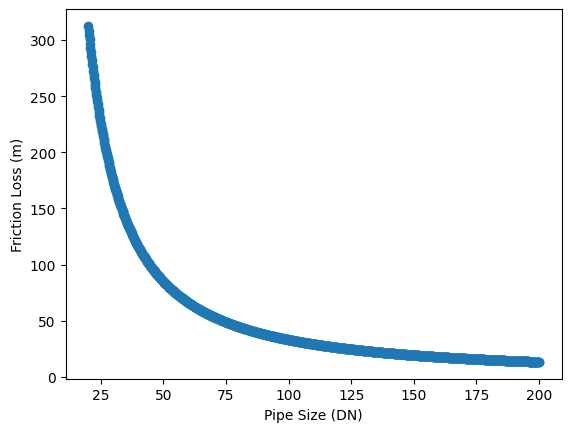

In [13]:
# Plot the friction loss over a 1000 metres for pipe sizes up to DN200
dn = np.linspace(0.02, 0.2, 1000)

rho = 1000  # kg/m3
mu = 0.001  # Pa.s
V = 3  # m/s
e = 0.001  # mm
l = 1000  # 1000 m

re = re_number(rho=rho, mu=mu, D=dn, V=V)
f = swamee_jain(e=e, D=dn, re=re)
h = friction_loss(f=f, L=l, D=dn, V=V)

# plot
plt.scatter(x=dn*1000, y=h)
plt.ylabel('Friction Loss (m)')
plt.xlabel('Pipe Size (DN)')

**References**

[1] Yunus Cengel, Fluid Mechanics. 4th edition. 2017.

## Pump Power

**Formula**
$$ P = \frac{\rho g Q H}{\eta} $$
**Parameters**
- $\rho$ : float
   - Density of the fluid, [kg/m³]
- g : float
    - Gravitational acceleration = 9.81, [m/s²]
- Q : float
    - Flowrate, [m3/s]
- H : float
    - Pump head produced, [m]
- $\eta$ : float
    - Efficiency, [%]

**Returns**
- $P$ : float
    - Pump Power, [W]

**Python Formula**

In [14]:
def pump_power(rho, Q_m3h, H, eta, g = 9.81):
    Q_m3s = Q_m3h / 60 / 60
    P = (rho*g*Q_m3s*H)/eta
    return P

**Example**

In [15]:
rho    = 936
Q_m3h  = 1613
H      = 64.08
eta    = 0.7

round(pump_power(rho, Q_m3h, H, eta) / 1000, 2) # kw

376.62

**References**

[1] Yunus Cengel, Fluid Mechanics. 4th edition. 2017.

## Pump Affinity Laws

**Formula**
$$ \frac{\dot{V_B}}{\dot{V_A}} = \frac{\omega{_B}}{\omega{_A}} \left(\frac{D_B}{D_A}\right)^3 $$

$$ \frac{H_B}{H_A} = \left(\frac{\omega{_B}}{\omega{_A}}\right)^2 \left(\frac{D_B}{D_A}\right)^2 $$

$$ \frac{P_B}{P_A} = \frac{\rho{_B}}{\rho{_A}} \left(\frac{\omega{_B}}{\omega{_A}}\right)^3 \left(\frac{D_B}{D_A}\right)^5 $$

**Parameters**

- $\dot{V}$ : float
    - Volume flow rate, [m³/s]
- $\omega$ : float
    - Angular frequency (can use rpm as the units cancel out), [rad/s]
- D : float
    - Diameter of impeller, [m]
- H : float
    - Pump head, [m]
- P : float
    - Pump power, [W]
- $\rho$ : float
   - Density of the fluid, [kg/m³]

**Returns**
- $\dot{V_B}$ : float
    - Volume flow rate, [m³/s]

or
- $H_B$ : float
    - Pump head, [m]

or
- $P$ : float
    - Pump power, [W]

**Python Formula**

In [16]:
def affinity_flow(V_A, omega_A, omega_B, D_A, D_B):
    V_B = V_A * (omega_B/omega_A) * (D_B/D_A)**3
    return V_B

def affinity_head(H_A, omega_A, omega_B, D_A, D_B):
    H_B = H_A * (omega_B/omega_A)**2 * (D_B/D_A)**2
    return H_B

def affinity_power(P_A, rho_A, rho_B, omega_A, omega_B, D_A, D_B):
    P_B = P_A * (rho_B/rho_A)*(omega_B/omega_A)**3 * (D_B/D_A)**5
    return P_B

**Example**

In [17]:
affinity_power(200, 1000, 1000, 1500, 2000, 500, 480)

386.5470566399998

**References**

[1] Yunus Cengel, Fluid Mechanics pg. 777. 4th edition. 2017.

## Flow Discharge Factor - K Factor
**Formula**
$$ K_L = \frac{h_L*2*g}{V^2} $$

**Parameters**
- h_L : float
    - Head losses through fitting, [m]
- V : float
    - Velocity of fluid, [m/s]
- g : float
    - Gravitational acceleration = 9.81, [m/s²]

**Returns**
- K_L : float
    - Flow Discharge Factor, [-]
    
**Python Formula**

In [18]:
def k_factor(h_L, V, g = 9.81):
  K_L = (h_L*2*g)/(V**2)
  return K_L

**Example**

In [19]:
h = 150
v = 3.2

k_factor(h, v)

287.40234374999994

**References**

[1] Yunus Cengel, Fluid Mechanics. eq. (8–55). 4th edition. 2017.

## Relationship Between Flow Coefficient and Resistance Coefficient

**Formula**
$$ K = 0.00214\frac{d^4}{C_v^2} $$
**Parameters**
- d : float
    - Diameter, [mm]
- C_v : float
    - Flow coefficient, [gal/min]

**Returns**
- K : float
    - Flow Discharge Factor, [-]

**Python Equation**

In [20]:
def flow_to_resist_coef(d, C_v):
    K = 0.00214 * ((d**4) / (C_v**2))
    return K

**Example**

In [21]:
flow_to_resist_coef(72.8, 140)

3.0667842150399993

**Reference**

[Relationship Between Flow Coefficient and Resistance Coefficient](http://kb.eng-software.com/eskb/ask-an-engineer/theory-equations-and-calculated-results-questions/relationship-between-flow-coefficient-and-resistance-coefficient)

## Round-Edged Orifice with Identical Upstream and Downstream Diameters

<center><img src="images/rounded_orifice.png" width="250"></center>

**Formula**
$$ K = \left(\frac{A_{up}}{A_{orifice}}\right)^2  \left[1 - \frac{A_{orifice}}{A_{up}}+ \sqrt{K_d} \left(1-\frac{A_{orifice}}{A_{up}}\right)^{0.75}\right]^2 $$
where
$$ K_d = 0.03 + 0.47 * 10 ^ {-7.7 r_{edge} / D_{orifice}} $$

**Parameters**
- $ A_{up} $ : float
    - Area of upstream pipe, [m²]
- $A_{orifice}$ : float
    - Area of orifice, [m²]
- $r_{edge}$ : float
    - Radius of rounded orifice, [m]

**Returns**
- K : float
    - Flow Discharge Factor, [-]

**Python Equation**

In [22]:
def k_up(D_up, D_orifice, r_edge):
    k_dash = 0.03 + 0.47 * 10 ** (-7.7 * r_edge / D_orifice)
    A_up = (math.pi * D_up**2) / 4
    A_orifice = (math.pi * D_orifice**2) / 4
    k_up = (A_up / A_orifice) ** 2 * (
        1 - (A_orifice / A_up) + math.sqrt(k_dash) * ((1 - (A_orifice / A_up)) ** 0.75)
    ) ** 2
    return k_up

**Example**

In [23]:
D_up = 254.6  # mm

D_orifice = D_up - (2 * 8)  # 8 mm beads

r_edge = 20  # mm

k_bead = k_up(D_up, D_orifice, r_edge)

k_total = (5200 / 20) * k_bead

print(f"total K from beads over 5.2 km  = {k_total:.2f}")

total K from beads over 5.2 km  = 13.19


**References**

[1]: Idelchik, I. E., Handbook of Hydraulic Resistance, 4th edition, Begell House, Redding, CT, 2007.

## Open Channel Flow

**Summary**
- Generally target 50% fillage
- No single mathematical model to represent slurry flows in open channels
- Max practical limit of slurry concentration is 65 wt%

**Dimensions**

Hydraulic Radius = area of the flow : wetted perimeter
$$R_H = \frac{A}{P}$$
Hydraulic Diameter
$$D_H = \frac{4A}{P}$$

**Hydraulic Diameter Dimensions**

<center><img src="images/hyd_rad.png" width="500"></center>

### Froude Number
- Is a measure of the stability of flow in an open channel. Ratio of the fluids' inertia to gravity forces.

**Slurry**
- Below 1.5 there is risk of settling and instability / wavy motion
- Above 5 there is risk of [[Slug flow]] which causes instability in the form of roll waves

$$1.5 < F_r < 5$$

**Water**
- Sub-critical flow for water (Fr less than 0.8) is not a problem as there is no risk of settling. Therefore:

$$F_r < 0.8$$
or
$$F_r > 1.2$$

**Equation**

$$F_r =\frac{V}{\sqrt{g*y_m}}$$

**Parameters**
- y_m : float
    - Average depth of the liquid, [m]
- V : float
    - Velocity of fluid, [m/s]
- g : float
    - Gravitational acceleration = 9.81, [m/s²]

**Returns**
- Fr : float
    -  Froude Number, [-]

**Python Equation**


In [24]:
def froude_no(V, y_m, g = 9.81):
    return V / math.sqrt(g * y_m)

**Example**

In [25]:
V   = 3
y_m = 0.5

froude_no(V, y_m)

1.3545709229571927

**References**

[1]: SLURRY SYSTEMS HANDBOOK. BAHA E. ABULNAGA, P.E. 2002

### Fillage Calculation

In [26]:
def fillage_calc(Q_m3h, H1_highspot, H2_lowspot, Length_pipe, ID_m, f_d):
    h_delta = H1_highspot-H2_lowspot
    r = ID_m/2         # radius
    A_pipe = (np.pi * ID_m ** 2)/4
    df = pd.DataFrame(data= {'theta_deg': np.linspace(0.1,180,1800)})
    df['theta'] = np.deg2rad(df['theta_deg'])
    df['R_h'] = (r*(df['theta']-np.sin(df['theta'])*np.cos(df['theta']))
                 )/(2*df['theta'])
    df['A_c'] = r**2*(df['theta']-np.sin(df['theta'])*np.cos(df['theta']))
    df['y'] = r*(1-np.cos(df['theta']))     # Height of the liquid
    df['fillage'] = df['y']/ ID_m *100      # % fillage
    df['V_L'] = (Q_m3h/60/60)/(df['A_c'])   # Velocity of the liquid
    df['h_fric'] = (f_d * Length_pipe * df['V_L'] **2 )/(2*9.81*4*df['R_h'])
        
    # Find closest match of fricion loss to the elevation difference
    result_index = df['h_fric'].sub(h_delta).abs().idxmin()
    # Check Froude Number
    Fr = df['V_L'][result_index] / np.sqrt(9.81 * df['y'][result_index])
    fillage = df['fillage'][result_index]
    
    # Assuming that the velocity of the slurry is equal to the air velocity
    Q_air = df['V_L'][result_index] * A_pipe * 60 * 60 - Q_m3h
    
    results = pd.DataFrame({'fillage %':[fillage],
                            'Froude No.':[Fr],
                            'Velocity':[df['V_L'][result_index]],
                            'Vent Air Flow Req. m3/h':[Q_air]})
    return results

**Example**

In [27]:
Q_m3h        = 420
H1_highspot  = 30
H2_lowspot   = 0
Length_pipe  = 200
ID_m         = 0.254
f_d          = 0.05

fillage_calc(Q_m3h, H1_highspot, H2_lowspot, Length_pipe, ID_m, f_d)

,fillage %,Froude No.,Velocity,Vent Air Flow Req. m3/h
0,55.920198,3.391045,4.002849,310.178512


**References**

[1] Yunus Cengel, Fluid Mechanics pg. 777. 4th edition. 2017.

## Compressible flow
### Nominal vs Actual Flow Rate
**Formula**
$$ PV = nRT $$
$$ \frac{P_NV_N}{T_N} = \frac{P_AV_A}{T_A} $$
$$ V_A = \frac{P_NV_NT_A}{P_AT_N} $$
$$ V_N = \frac{P_AV_AT_N}{P_NT_A}$$
**Parameters**
- $P_N$ : float
    - Standard Pressure = 101.3, [kPa]
- $T_N$ : float
    - Standard Temperature = 273.16, [K]
- $V_N$ : float
    - Nominal Flow Rate, [Nm³/h]
- $P_A$ : float
    - Fluid Pressure, [kPa]
- $T_A$ : float
    - Fluid Temperature, [K]
- $V_A$ : float
    - Actual Flow Rate, [m³/h]

**Returns**
- K : float
    - Flow Discharge Factor, [-]

**Python Equation**

In [28]:
def find_VA(V_n, T_a, P_a):
    return (101.3 * V_n * T_a)/(P_a* 273.16)

def find_VN(V_a, T_a, P_a):
    return (P_a * V_n * 273.16)/(101.3 * T_a)

**Example**

In [29]:

V_n = 21889         # Nm3/h
T_a = 45 + 273.16   # K
P_a = 700           # kPa

find_VA(V_n = V_n, T_a = T_a, P_a = P_a)


3689.4854376921944

## Water Conductivity
TDS or Total Dissolved Solids is a measure of the total ions in solution. EC is actually a measure of the ionic activity of a solution in term of its capacity to transmit current. In dilute solution, TDS and EC are reasonably comparable. The TDS of a water sample based on the measured EC value can be calculated using the following equation:

**Formula**
$$ TDS = 640 * EC $$
**Parameters**
- $EC$ : float
    - Electrical conductivity (EC), [mS/cm]

**Returns**
- TDS : float
    - Total Dissolved Solids, [mg/L]

**Python Equation**

In [30]:
def water_conductivity(EC):
    return 640 * EC

**Example**

In [31]:
EC = 0.02 # 20 uS/cm

water_conductivity(EC)

12.8

**References**

[Water Conductivity](https://www.lenntech.com/calculators/conductivity/tds_engels.htm)

# Slurry

## Slurry Concentrations

### SG & Concentration Conversions
For any slurries, when any three of the five variables are known, the fourth and fifth may be calculated from the equations shown below. Alternatively the diagram below may be used for the same purpose although that diagram cannot be used to calculate Sw.

<center><img src="images/slurry_conversions.png" width="700"></center>

**Equations**

| Find  | No 1.                                 | No. 2                         | No. 3                                 |
|:----: |    :----:                             |    :----:                     |    :----:                             |
| $S_w$ | $$ S(S_m C_w–S_m) / (S_m C_w–S) $$    | $$ (S C_v–S_m) / (C_v–1) $$   | $$ S[C_v(C_w–1)] / [C_w(C_v–1)] $$    |
| $S$   | $$ S_w C_w(C_v–1) / [C_v(C_w–1)] $$   | $$ S_w+(S_m–S_w) / C_v $$     | $$ S_wC_w / (C_w–1+S_w/S_m) $$        |
| $S_m$ | $$ S_w / [1–C_w(1–S_w/S)] $$          | $$ S_w+C_v(S–S_w) $$          | $$ S_w(C_v–1) / (C_w–1) $$            |
| $C_w$ | $$ S(S_m–S_w) / [S_m(S–S_w)] $$       | $$ SC_v / [S_w+C_v(S–S_w)] $$ | $$ 1+S_w(C_v–1) / S_m $$              |
| $C_v$ | $$ (S_m–S_w) / (S–S_w) $$             | $$ S_w / (S_w–S+S/C_w) $$     | $$ 1+S_m(C_w–1) / S_w $$              |

**Parameters**
- $S_w$ : float
    - SG of liquid, usually water at 20°C = 1, [-]
- $S$ : float
    - SG of dry solids, [-]
- $S_m$ : float
    - SG of slurry, [-]
- $C_w$ : float
    - Concentration of solids in slurry, by weight, [%]
- $C_v$ : float
    - Concentration of solids in slurry, by true volume [%]

**Returns**
- Various

**Python Equation**

In [32]:
def slurry_convert(Sw=None, S=None, Sm=None, Cw=None, Cv=None):
    list = [Sw, S, Sm, Cw, Cv]
    test = [v is None for v in list]
    if sum(test) == 2:
        if list[0] is None:
            if not any([test[2], test[3]]):
                return {'Sw': [S*(Sm*Cw-Sm)/(Sm*Cw-S)]}
            if not any([test[2], test[4]]):
                return {'Sw': [(S*Cv-Sm)/(Cv-1)]}
            if not any([test[3], test[4]]):
                return {'Sw': [S*(Cv*(Cw-1))/(Cw*(Cv-1))]}
        else:
            if not any([test[3], test[4]]):
                return {'S': Sw*Cw*(Cv-1)/(Cv*(Cw-1)), 'Sm': Sw*(Cv-1)/(Cw-1)}
            if not any([test[2], test[4]]):
                return {'S':Sw+(Sm-Sw)/Cv, 'Cw':1+Sw*(Cv-1)/Sm}
            if not any([test[2], test[3]]):
                return {'S':Sw*Cw/(Cw-1+Sw/Sm), 'Cv':1+Sm*(Cw-1)/Sw}
            if not any([test[1], test[3]]):
                return {'Sm':Sw/(1-Cw*(1-Sw/S)), 'Cv':Sw/(Sw-S+S/Cw)}
            if not any([test[1], test[4]]):
                return {'Sm':Sw+Cv*(S-Sw), 'Cw':S*Cv/(Sw+Cv*(S-Sw))}
            if not any([test[1], test[2]]):
                return {'Cv':(Sm-Sw)/(S-Sw),'Cw': S*(Sm-Sw)/(Sm*(S-Sw))}
    elif sum(test) < 2:
        return 'too many variables'
    else:
        return 'missing variables'

**Example**

In [33]:
slurry_convert( Sw = 1,         # SG Water
                S = None,       # SG Solids
                Sm = 1.23,      # SG Slurry
                Cw = 0.4,       # %wt
                Cv = None)       # %vol

{'S': 1.8778625954198473, 'Cv': 0.262}

**References**

[1]: WEIR SLURRY PUMPING MANUAL. 2002.

### GPL to %Cw & %Cv

**Formula**
$$ C_v = \frac{gpl/1000}{S} $$

$$ C_w = \frac{S*gpl}{(gpl+1000S_w)S-gpl*S_w} $$

**Parameters**
- gpl : float
    - Solids concentration in grams per liter of slurry, [g/l]
- $S_w$ : float
    - SG of liquid, usually water at 20°C = 1, [-]
- $S$ : float
    - SG of dry solids, [-]

**Returns**
- $C_w$ : float
    - Concentration of solids in slurry, by weight, [%]
- $C_v$ : float
    - Concentration of solids in slurry, by true volume [%]
**Python Equation**

In [34]:
def gpl_to_cv(S, gpl):
    return (gpl/1000)/S

def gpl_to_cw(S, gpl, Sw):
    return S*gpl/((gpl+1000*Sw)*S-gpl*Sw)

**Example**

In [35]:
S   = 1
gpl = 699
Sw  = 1
gpl_to_cw(S, gpl, Sw)

0.699

## Settling Velocity

### Oroskar Turian

**Formula**
$$ V_{OT} = \sqrt{gd(S-1)} \left[1.85C_c^{0.1536}(1-C_c)^{0.3564} \left(\frac{D}{d}\right)^{0.378} \left(\frac{\rho{_f}D\sqrt{gd(S-1)}}{\mu{_f}} \right)^{0.09} X^{0.3} \right] $$

**Parameters**
- $g$ : float
    - Gravitational acceleration = 9.81, [m/s²]
- $D$ : float
    - Pipe inner diameter, [m]
- $d$ : float
    - Particle diameter (Coarse d50), [m]
- $S$ : float
    - Ratio of the coarse solid density to carrier fluid density $\rho{_S}/\rho{_f}$, [-]
- $C_c$ : float
    - The coarse particle volume fraction (i.e., particles exceeding 74 μm), [%]
- $\rho{_f}$ : float
    - Carrier fluid, including fines density, [kg/m³]
- $\mu{_f}$ : float
    - Carrier fluid dynamic viscosity, [Pa.s]
- $X$ : float
    - Hindered settling factor = 1, [-]

**Returns**
- $V_{OT}$ : float
    - Oroskar and Turian (1980) critical velocity, [m/s]
    
**Python Formula**

In [36]:
def oroskar(D, d, S, C_c, rho_f, mu_f, X=1, g=9.81):
    V_ot = ((g*d*(S-1))**0.5)*\
    (\
        (1.85*C_c**0.1536)*\
        ((1-C_c)**0.3564)*\
        ((D/d)**0.378)*\
        (((rho_f*D*((g*d*(S-1))**0.5))/mu_f)**0.09)*\
        (X**0.3)
    )
    return V_ot

**Example**

In [37]:
D     = 0.2546
d     = 0.212E-3
rho_f = 1129
S     = 2200/rho_f
C_c   = 0.12183
mu_f  = 0.02

oroskar(D, d, S, C_c, rho_f, mu_f, X=1)

1.4814985790258441

## Bingham Friction Factor

Calculates the Darcy friction factor for a Bingham plastic. Calculated for any Reynolds number, from laminar through turbulent. [1]

**Formula**
$$ UPDATED ME $$

**Parameters**
- d_m : float
    - Inner Diameter of Pipe, [m]
- v : float
    - Velocity, [m/s]
- rho : float
    - Density of Slurry, [kg/m³]
- t_0 : float
    - Yield stress, [Pa]
- mu_b : float
    - Plastic Viscocity [Pa.s]

**Returns**
- f_d : float
    - Darcy Friction Factor, [-]

**Python Formula**

In [38]:
def bingham_darcy_friction_factor(d_m, v, rho, t_0, mu_b):
    N_re = d_m*v*rho/mu_b
    N_he = d_m**2*rho*t_0/mu_b**2
    # Laminar
    f_L = 16/N_re*(1+1/6*(N_he/N_re))
    for i in range(10):
        f_L = 16/N_re*(1+1/6*(N_he/N_re)-((N_he**4)/(3*f_L**3*N_re**7)))  
    f_L = 4 * f_L       # Converts to Darcy Friction Factor
    # Turbulent
    a = -1.47*(1+0.146*math.exp(-2.9*10**-5*N_he))
    f_T = 4 * (10**a/N_re**0.193)
    # Combine
    m = 1.7+40000/N_re
    return (f_L**m+f_T**m)**(1/m)

In [39]:
bingham_darcy_friction_factor(0.254, 2.3, 1300, 6, 0.02)

0.01905007708620241

**References**

[1]: Ron Darby, Chemical Engineering Fluid Mechanics. 2nd edition. 2001.

# Bulk Materials Handling

## Conveyor Belt Sizing

### Required Area for Mass Flow

The conveyed bulk material cross sectional area, A, can be calculated from the design inputs for tonnage, Q, belt speed, V, bulk density, $\gamma_m$, and $\Theta $ = 0 degrees.  [1]

**Formula**
$$ A = \frac{Q}{V \gamma_m} $$

**Parameters**
- $\gamma_m$ : float
    - Conveyed bulk density, [kg/m³]
- $Q$ : float
    - Bulk material tonage, [t/h]
- $V$ : float
    - Belt speed, [m/s]

**Returns**
- $A$ : float
    - Required conveyed cross sectional area, [m²]

**Python Formula**

In [40]:
def req_conv_area(bulk_density, tonnage, belt_velocity):
    return (tonnage * 1000/60/60) / (belt_velocity * bulk_density)

**Example**

In [41]:
bulk_density    = 1620
tonnage         = 51.69
belt_velocity   = 0.15

req_conv_area(bulk_density, tonnage, belt_velocity)

0.059087791495198896

**References**

[1]: CEMA, Belt Conveyors for Bulk Materials. 7th edition. 2014.

### CEMA Standard Capacity Cross Sectional Area, $A_s$

Equation 4.15 is used to calculate, As, for standard CEMA three equal roll roughing idlers based on the average CEMA center roll length circular surcharge surface and the CEMA standard belt edge. [1]

**Formula**
$$ UPDATED ME $$

**Parameters**
- BW : float
    - Belt Width, [mm]
- $\beta$ : float
    - Idler trough angle, [deg]
- $\Phi_s$ : float
    - Material surcharge angle, [deg]

**Returns**
- $A_s$ : float
    - CEMA Standard Cross Sectional Area, area based on three equal roll CEMA troughing idler, the surcharge angle with circular top surface, and standard edge distance, [m²]

**Python Formula**

In [42]:
def cema_area(BW, beta, phi):
    beta    = math.radians(beta)            # Convert deg to radians
    phi     = math.radians(phi)             # Convert deg to radians
    bc      = (0.371 * BW + 6.35)/BW        # Equation 4.11
    bw      = (1-bc)/2                      # Equation 4.13
    bwe     = (0.055 * BW + 22.9)/BW        # Equation 4.12
    bwmc    = bw - bwe
    rsch    = ((bc/2)/(math.sin(phi)))+((math.cos(beta)*bwmc)/(math.sin(phi)))
    A_s = 2*BW**2 * \
        (rsch**2*((phi/2)-((math.sin(phi)*math.cos(phi))/2)))+\
        ((bc/2) * bwmc * math.sin(beta)) + \
        (bwmc**2 * ((math.sin(beta) * math.cos(beta))/2))
    A_s = A_s / 1000**2                 # Convert to m²
    return A_s

**Example**

In [43]:
BW = 1200
beta = 0
phi = 30

cema_area(BW, beta, phi)

0.09465273981919478

**References**

[1]: CEMA, Belt Conveyors for Bulk Materials. 7th edition. 2014.

# Corrosion

## PREN - Pitting Resistance Equivalent Number

The comparative pitting resistance between corrosion resistant alloys is established using a mathematical relationship based on the critical influence of key alloying elements common to various stainless steel alloys.This mathematical relationship is known as the pitting resistant equivalent number, or PREN. [1][2]

**Common PREN Numbers [3]**

<center><img src="images/PREN.png" width="700"></center>

**Formula**
$$ PREN = Cr + 3.3 (Mo + 0.5 W) + 16 N $$

**Parameters**
- $Cr$ : float
    - Chromium chemical composition (nominal), [wt%]
- $Mo$ : float
    - Molybdenum chemical composition (nominal), [wt%]
- $W$ : float
    - Tungsten chemical composition (nominal), [wt%]
- $N$ : float
    - Nitrogen chemical composition (nominal), [wt%]

**Returns**
- PREN : float
    - Pitting Resistance Equivalent Number, [-]

**Python Formula**

In [44]:
def pren(Cr, Mo, W, N):
    return Cr + 3.3 * (Mo + 0.5 * W) + 16 * N

**Example**

In [45]:
Cr = 22 # %
Mo = 2 # %
W = 14 # %
N = 0 # %

pren(Cr = Cr, Mo= Mo, W = W, N = N)


51.7

**References**

- [1]: Erin D. Mackey & Thomas F. Seacord, [Guidelines for Using Stainless Steel in the Water and Desalination Industries]("https://doi.org/10.5942/jawwa.2017.109.0044"). 2017.
- [2]: [Pitting resistance equivalent number]("https://en.wikipedia.org/wiki/Pitting_resistance_equivalent_number")
- [3]: [Learn the Anti-corrosion Code]("https://www.parker.com/literature/Instrumentation%20Products%20Division/Technical%20Articles/Learn_the-Anti-corrosion_code.pdf")